<h1><center> MACHINE LEARNING </center></h1>


<h1><center>Predicting Likelihood of a Liver disease</center></h1>

# Table of contents
- [Introduction](#OV)
    - [Report Overview](#ROO)
    - [Overview of Methodology](#OOM)
- [Predictive Modelling](#PPM)
    - [Feature Selection](#FFS)
    - [Model Fitting & Tuning](#MMFTT)
    - [Model Comparison](#MMCC)
- [Critique and Limitations](#CCL)
- [Summary and Conclusions](#CC)
    - [Project Summary](#PPS)
    - [Summary of Findings](#SOOF)
    - [Conclusions](#CCC)

# Introduction <a name="OV"></a>

## Report Overview <a name="ROO"></a>

- Methodology used in predictive modeling 
- Encoding and Scaling the descriptive features and target feature
- Feature Selection and Ranking to gain insight about the best performing features
- Spliting the dataset for training and testing
- Hyperparameter Tuning with five binary classifiers
- Model Comparison to find the best performing and statistically significant model using paired t-tests
- Critique and Limitations
- Summary of the project
- Conclusion

##  Overview of Methodology <a name="OOM"></a>

For Predictive modelling, we used five binary classifiers to predict the target feature:

- K Nearest Neighbor (KNN)
- Naive Bayes (NB)
- Decision Tree (DT)
- Random Forest Classifier
- Support Vector Machine

In the phase 1 of the project, we preprocessed the dataset and performed data exploration for a better understanding. In this phase, we use preprocessed dataset from phase 1 and transform the dataset. Data transformation includes, encoding the descriptive features into numeric (categorical features) and scaling the other descriptive features. We split the dataset into into train and test dataset with a 70:30 ratio. Hence, the training dataset contains 408 instances and test dataset contains 175 instances. 

We performed feature ranking and selected the best features. We performed feature selection using F-score, Mutual information, Random Forest Importance and SpFSR. From all these methods, we selected the best features using Random Forest Importance with  100 estimators inside a pipeline. The best features were categorized by selecting 2,4,6,8,10 and all the features after encoding and scaling the descriptive features. 

We implement a 5-fold stratified cross validation to fine tune hyper-parameters of each classifier using AUC (Area Under Curve) as performance metric. This is done by using feature selection and hyperparameter search within a single pipeline. The selector field i.e. the target feature has more values of patients with a liver disease, it is important to stratify the dataset so that this dataset and the original dataset has same proportion of classes. Once, the classification is performed, they are fitted on the test data using a 10-fold cross-validation. The next step performed is the paired t-tests to check their performance and check if they are statistically significant. 

Finally, these classifiers are compared on the test data using their recall scores and confusion matrices. 

#### Dataset Details

- The data set includes details about Indian patients suffering from liver disease and whether or not the person has a liver disease. The dataset consists of 584 patients registering liver diseases and analysed by the 'Indian liver patient data.csv'. The dataset are sourced from the [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/ILPD+%28Indian+Liver+Patient+Dataset%29). These medical records contain their body characteristics and some test findings in the laboratory. A logistic regression model can predict whether or not the individual has a liver disease.
- The electronic health records can be valuable information resources for revealing connections with and relationships between patient data, not just for the purpose of study, but also for quashing misunderstandings on risk factors that cause liver disease. The variables or factors into consideration are Patient’s age, gender, Total Bilirubin (TB), Direct Bilirubin (DB), Alkphos Alkaline Phosphotase, Sgpt Alamine Aminotransferase, Sgot Aspartate Aminotransferase, Total Protiens (TP), Albumin (ALB), Albumin-Globlulin Ratio (AG Ratio)and Selector field i.e., the Predictor variable. All these considerations allow us to say whether or not the patient has liver disease.


In [1]:
pip install tabulate

Note: you may need to restart the kernel to use updated packages.


In [2]:
from tabulate import tabulate

table = [['Name of the feature', 'Data type', 'Units', 'Brief description'],
        ['Age', 'Numerical', 'Years', 'Patients age in no. of years.'],  
        ['Gender', 'Categorical', 'Unknown', 'Whether a Patient is Male or Female'], 
        ['TB', 'Numerical', 'mg/dL', 'Level of Total Bilirubin in blood'],
        ['DB', 'Numerical', 'mg/dL', 'Level of Direct Bilirubin in blood'],
        ['Alkphos Alkaline Phosphotase ', 'Numerical', 'IU/L', 'Level of ALP in blood'], 
        ['Sgpt Alamine Aminotransferase', 'Numerical', 'Units/serum', 'Level of SGPT in blood'], 
        ['Sgot Aspartate Aminotransferase ', 'Numerical', 'per-litre/serum', 'Level of SGOT in blood'], 
        ['TP', 'Numerical', 'g/dL', 'Level of Total Proteins in blood'], 
        ['ALB', 'Numerical', 'g/dL', 'Level of Albumin in blood'], 
        ['AG Ratio', 'Numerical', 'g/dL', 'Ratio of Albumin in Globulin in blood'],
        ['Selector field ', 'Categorical', 'Unknown', 'Predictor variable']]


In [4]:
print(tabulate(table, headers='firstrow', tablefmt='fancy_grid'))

╒═════════════════════════════════╤═════════════╤═════════════════╤═══════════════════════════════════════╕
│ Name of the feature             │ Data type   │ Units           │ Brief description                     │
╞═════════════════════════════════╪═════════════╪═════════════════╪═══════════════════════════════════════╡
│ Age                             │ Numerical   │ Years           │ Patients age in no. of years.         │
├─────────────────────────────────┼─────────────┼─────────────────┼───────────────────────────────────────┤
│ Gender                          │ Categorical │ Unknown         │ Whether a Patient is Male or Female   │
├─────────────────────────────────┼─────────────┼─────────────────┼───────────────────────────────────────┤
│ TB                              │ Numerical   │ mg/dL           │ Level of Total Bilirubin in blood     │
├─────────────────────────────────┼─────────────┼─────────────────┼───────────────────────────────────────┤
│ DB                        

#### Target Feature

- Target feature or the predictor variable is `Selector field`. It is a categorical variable with values '1' and '2' where one (1) represents the person is suffering from a liver disease and two (2) represents the person is not suffering from a liver disease. 

- The predictor variable will be used in the phase two as target feature in the regression model. The dependent variables are Age, Total and Direct Bilirubin, SGPT, SGOT, Total proteins, Albumin, Albumin to Globulin Ratio.

#### Importing modules 

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [6]:
ilpd = pd.read_csv('D:/MS Analytics/Semester 3/Machine Learning/datagrp76.csv')
ilpd.head()

,Age,Gender,TB,DB,Alkphos Alkaline Phosphotase,Sgpt Alamine Aminotransferase,Sgot Aspartate Aminotransferase,TP,ALB,AG Ratio,Selector field
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1


- The full dataset has 583 instances and 12 variables

In [7]:
ilpd.isna().sum()

Age                                0
Gender                             0
TB                                 0
DB                                 0
Alkphos Alkaline Phosphotase       0
Sgpt Alamine Aminotransferase      0
Sgot Aspartate Aminotransferase    0
TP                                 0
ALB                                0
AG Ratio                           4
Selector field                     0
dtype: int64

- We check if dataset has any NA values
- If yes, we replace the NA values with mean of the respective column

In [11]:
ilpd['AG Ratio'].mean()

0.9470639032815201

In [12]:
ilpd=ilpd.fillna(0.9470639032815201)

In [13]:
ilpd.isna().sum()

Age                                0
Gender                             0
TB                                 0
DB                                 0
Alkphos Alkaline Phosphotase       0
Sgpt Alamine Aminotransferase      0
Sgot Aspartate Aminotransferase    0
TP                                 0
ALB                                0
AG Ratio                           0
Selector field                     0
dtype: int64

### Encoding Categorical Characteristics Numeric: <a name="ECCN"></a>

- Before predictive modeling, it is necessary to encode categorical features into numeric

In [14]:
ilpd['Gender'].replace('Female',0,inplace=True)
ilpd['Gender'].replace('Male',1,inplace=True)

In [15]:
ilpd.head()

,Age,Gender,TB,DB,Alkphos Alkaline Phosphotase,Sgpt Alamine Aminotransferase,Sgot Aspartate Aminotransferase,TP,ALB,AG Ratio,Selector field
0,65,0,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,1,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,1,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,1,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,1,3.9,2.0,195,27,59,7.3,2.4,0.40,1


#### Note for respected column variable (selected field)<a name="RCV"></a>

The `selector field` variable contains values `1` and `2`.
 
`1(One)` represents that **'the patient has liver disease or liver cancer'**.  

`2(Two)` represents that **'the patient does not have a liver disease or liver cancer'** 
   

- Creating a new variable Age Group for better understanding of Age of Patients `(from Phase 1)`

In [16]:
def Age_group(row):
    if row['Age'] >= 0 and row['Age'] <= 25:
        return '0 to 25'
    elif row['Age'] >= 26 and row['Age'] <= 50:
        return '26 to 50'
    elif row['Age'] >= 51 and row['Age'] <= 75:
        return '51 to 75'
    elif row['Age'] >= 76 and row['Age'] <= 100:
        return 'Over 75'
    else:
        return 'Over 100'
    
ilpd['Age_group'] = ilpd.apply(Age_group, axis=1)


#### Summary Statistics

In [17]:
ilpd.describe(include='all')

,Age,Gender,TB,DB,Alkphos Alkaline Phosphotase,Sgpt Alamine Aminotransferase,Sgot Aspartate Aminotransferase,TP,ALB,AG Ratio,Selector field,Age_group
count,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,26 to 50
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,306
mean,44.746141,0.756432,3.298799,1.486106,290.576329,80.713551,109.910806,6.483190,3.141852,0.947064,1.286449,NaN
std,16.189833,0.429603,6.209522,2.808498,242.937989,182.620356,288.918529,1.085451,0.795519,0.318492,0.452490,NaN
min,4.000000,0.000000,0.400000,0.100000,63.000000,10.000000,10.000000,2.700000,0.900000,0.300000,1.000000,NaN
25%,33.000000,1.000000,0.800000,0.200000,175.500000,23.000000,25.000000,5.800000,2.600000,0.700000,1.000000,NaN
50%,45.000000,1.000000,1.000000,0.300000,208.000000,35.000000,42.000000,6.600000,3.100000,0.947064,1.000000,NaN
75%,58.000000,1.000000,2.600000,1.300000,298.000000,60.500000,87.000000,7.200000,3.800000,1.100000,2.000000,NaN


In [18]:
Data = ilpd.drop(columns='Selector field')
target = ilpd['Selector field']
target.value_counts()

1    416
2    167
Name: Selector field, dtype: int64

### Encoding the Target Feature
We remove the "Selector field" feature from the full dataset and call it "target". The rest of the features are the descriptive features which we call "Data".

Keep in mind that scikit-learn always requires all data to be numeric, so the target needs to be encoded as 0 and 1

In [20]:
from sklearn import preprocessing

target = preprocessing.LabelEncoder().fit_transform(target)

Note that "1" is labeled as 0 whereas "2 as labeled as 1 (see the code below).

In [21]:
np.unique(target, return_counts = True)

(array([0, 1], dtype=int64), array([416, 167], dtype=int64))

### Encoding Categorical Descriptive Features

We attempt one-hot encoding since all of the descriptive features appear to be nominal. We also establish q dummy variables for a category descriptive variable with q levels, because we intend to use feature selection. We design a single dummy variable when a category descriptive feature has just two levels. Let us generate a list of categorical descriptive features.

In [22]:
categorical_cols = Data.columns[Data.dtypes==object].tolist()

Before any transformation, the categorical features are as follows.

In [23]:
categorical_cols

['Age_group']

The coding operation is shown below. For each two-level categorical variable, we set the `drop_first` option to `True` to encode the variable into a single column of 0 or 1. Next, we apply the `get_dummies() `function for the regular one-hot encoding for categorical features with more than 2 levels.

In [24]:
for col in categorical_cols:
    n = len(Data[col].unique())
    if (n == 2):
        Data[col] = pd.get_dummies(Data[col], drop_first=True)
   
# use one-hot-encoding for categorical features with >2 levels
Data = pd.get_dummies(Data)

After encoding, the feature set has the following columns.

In [25]:
Data.columns

Index(['Age', 'Gender', 'TB', 'DB', 'Alkphos Alkaline Phosphotase',
       'Sgpt Alamine Aminotransferase', 'Sgot Aspartate Aminotransferase',
       'TP', 'ALB', 'AG Ratio', 'Age_group_0 to 25', 'Age_group_26 to 50',
       'Age_group_51 to 75', 'Age_group_Over 75'],
      dtype='object')

In [26]:
Data.sample(5, random_state=999)

,Age,Gender,TB,DB,Alkphos Alkaline Phosphotase,Sgpt Alamine Aminotransferase,Sgot Aspartate Aminotransferase,TP,ALB,AG Ratio,Age_group_0 to 25,Age_group_26 to 50,Age_group_51 to 75,Age_group_Over 75
42,42,1,6.8,3.2,630,25,47,6.1,2.3,0.60,0,1,0,0
440,49,0,0.8,0.2,198,23,20,7.0,4.3,1.50,0,1,0,0
193,49,1,1.3,0.4,206,30,25,6.0,3.1,1.06,0,1,0,0
508,46,1,18.4,8.5,450,119,230,7.5,3.3,0.70,0,1,0,0
400,66,0,0.7,0.2,162,24,20,6.4,3.2,1.00,0,0,1,0


### Scaling of Features
After encoding all the categorical features, we perform a min-max scaling of the descriptive features. But first we make a copy of the Data to keep track of column names.

In [27]:
from sklearn import preprocessing

Data_df = Data.copy()

Data_scaler = preprocessing.MinMaxScaler()
Data_scaler.fit(Data)
Data = Data_scaler.fit_transform(Data)

Let's have another look at the descriptive features after scaling. Pay attention that the output of the scaler is a NumPy array, so all the column names are lost. That's why we kept a copy of Data before scaling so that we can recover the column names below. We observe below that binary features are still kept as binary after the min-max scaling.

In [28]:
ilpd_df=pd.DataFrame(Data, columns=Data_df.columns).sample(5, random_state=999)
ilpd_df

,Age,Gender,TB,DB,Alkphos Alkaline Phosphotase,Sgpt Alamine Aminotransferase,Sgot Aspartate Aminotransferase,TP,ALB,AG Ratio,Age_group_0 to 25,Age_group_26 to 50,Age_group_51 to 75,Age_group_Over 75
42,0.441860,1.0,0.085791,0.158163,0.276991,0.007538,0.007522,0.492754,0.304348,0.120,0.0,1.0,0.0,0.0
440,0.523256,0.0,0.005362,0.005102,0.065950,0.006533,0.002033,0.623188,0.739130,0.480,0.0,1.0,0.0,0.0
193,0.523256,1.0,0.012064,0.015306,0.069858,0.010050,0.003049,0.478261,0.478261,0.304,0.0,1.0,0.0,0.0
508,0.488372,1.0,0.241287,0.428571,0.189057,0.054774,0.044725,0.695652,0.521739,0.160,0.0,1.0,0.0,0.0
400,0.720930,0.0,0.004021,0.005102,0.048363,0.007035,0.002033,0.536232,0.500000,0.280,0.0,0.0,1.0,0.0


# Predictive Modelling <a name="PPM"></a>

### Feature Selection <a name="FFS"></a>

- In feature selection and ranking, we performed feature selection using all the methods and selected Random Forest Importance as the best method
- Feature selection and ranking gives us an insight of top features that would help us in predicting whether a patient has liver disease

In [29]:
num_features = 10
from sklearn.ensemble import RandomForestClassifier
model_rfi = RandomForestClassifier(n_estimators=100)
model_rfi.fit(Data, target)
fs_indices_rfi = np.argsort(model_rfi.feature_importances_)[::-1][0:num_features]

In [30]:
best_features_rfi = ilpd.columns[fs_indices_rfi].values
best_features_rfi

array(['Alkphos Alkaline Phosphotase', 'Sgot Aspartate Aminotransferase',
       'Sgpt Alamine Aminotransferase', 'Age', 'TB', 'TP', 'ALB',
       'AG Ratio', 'DB', 'Gender'], dtype=object)

These are the best features selected by the Random Forest Importance method

In [31]:
feature_importances_rfi = model_rfi.feature_importances_[fs_indices_rfi]
feature_importances_rfi

array([0.13707095, 0.13086225, 0.12739408, 0.1100948 , 0.10525792,
       0.09046677, 0.08955323, 0.07646246, 0.07634503, 0.01809375])

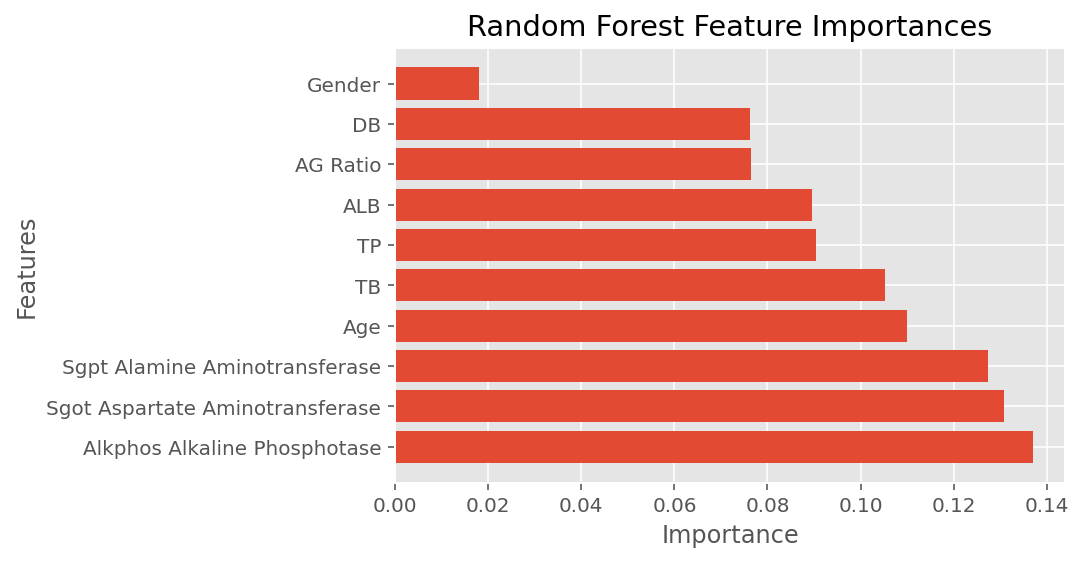

In [32]:
import matplotlib.pyplot as plt
%matplotlib inline 
%config InlineBackend.figure_format = 'retina'
plt.style.use("ggplot")

def plot_imp(best_features, scores, method_name):   
    plt.barh(best_features, scores)
    plt.title(method_name + ' Feature Importances')
    plt.xlabel("Importance")
    plt.ylabel("Features")
    
plot_imp(best_features_rfi, feature_importances_rfi, 'Random Forest')


We find that Alkphos Alkaline Phosphotase is the most important feature, followed by SGOT, SGPT, Age of patient etc.

## Data Sampling & Train-Test Splitting
We split the descriptive features and the target feature into a training set and a test set by a ratio of 70:30. That is, we use 70% of the data to build our classifiers and evaluate their performance on the remaining 30% of the data. It is is to ensure that we measure model performance on unseen data to avoid overfitting. We also set a random state value so that we can replicate our results later on.

In [33]:
from sklearn.model_selection import train_test_split

D_train, D_test, t_train, t_test = train_test_split(Data, 
                                                    target, 
                                                    test_size = 0.3,
                                                    random_state=999)

print(D_train.shape)
print(D_test.shape)

(408, 14)
(175, 14)


## Model Fitting & Tuning <a name="MMFTT"></a>

In [2]:
from sklearn.model_selection import StratifiedKFold, GridSearchCV

cv_method = StratifiedKFold(n_splits=5, random_state=999)

Here we will train our data with a 5-fold stratified cross-validation for hyperparameter tuning and use it for prediction on test data 

## Hyperparameter Tuning 
### K-Nearest Neighbors (KNN)

- We will use pipeline to stack feature selection and grid search for KNN hyperparameter tuning
- KNN parameters will n_neighbors (no. of neighbors) and p (distance metric)

In [35]:
from sklearn.base import BaseEstimator, TransformerMixin

# custom function for RFI feature selection inside a pipeline
# here we use n_estimators=100
class RFIFeatureSelector(BaseEstimator, TransformerMixin):
    
    # class constructor 
    # make sure class attributes end with a "_"
    # per scikit-learn convention to avoid errors
    def __init__(self, n_features_=10):
        self.n_features_ = n_features_
        self.fs_indices_ = None

    # override the fit function
    def fit(self, X, y):
        from sklearn.ensemble import RandomForestClassifier
        from numpy import argsort
        model_rfi = RandomForestClassifier(n_estimators=100)
        model_rfi.fit(X, y)
        self.fs_indices_ = argsort(model_rfi.feature_importances_)[::-1][0:self.n_features_] 
        return self 
    
    # override the transform function
    def transform(self, X, y=None):
        return X[:, self.fs_indices_]

In [36]:
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsClassifier

pipe_KNN = Pipeline(steps=[('rfi_fs', RFIFeatureSelector()), 
                           ('knn', KNeighborsClassifier())])

params_pipe_KNN = {'rfi_fs__n_features_': [2,4,6,8,10, Data.shape[1]],
                   'knn__n_neighbors': [1, 5, 10, 15, 20],
                   'knn__p': [1,2,5]}

gs_pipe_KNN = GridSearchCV(estimator=pipe_KNN, 
                           param_grid=params_pipe_KNN, 
                           cv=cv_method,
                           refit=True,
                           n_jobs=-2,
                           scoring='roc_auc',
                           verbose=1) 

In [37]:
gs_pipe_KNN.fit(D_train, t_train);

Fitting 5 folds for each of 90 candidates, totalling 450 fits


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=-2)]: Done  44 tasks      | elapsed:    8.7s
[Parallel(n_jobs=-2)]: Done 194 tasks      | elapsed:   25.9s
[Parallel(n_jobs=-2)]: Done 444 tasks      | elapsed:   53.2s
[Parallel(n_jobs=-2)]: Done 450 out of 450 | elapsed:   53.8s finished


In [38]:
gs_pipe_KNN.best_params_

{'knn__n_neighbors': 15, 'knn__p': 1, 'rfi_fs__n_features_': 4}

In [39]:
gs_pipe_KNN.best_score_

0.748349554036541

- Mean AUC score of the KNN model = 0.748349554036541.
- The model selected 4 features with 15 n_neighbors with Manhattan distance (p=1)

- We will look at other combinations to see if the difference is significant or not. 
- Hence, we will make use of the function below to format the grid search outputs as a Pandas data frame.

In [40]:
# custom function to format the search results as a Pandas data frame
def get_search_results(gs):

    def model_result(scores, params):
        scores = {'mean_score': np.mean(scores),
             'std_score': np.std(scores),
             'min_score': np.min(scores),
             'max_score': np.max(scores)}
        return pd.Series({**params,**scores})

    models = []
    scores = []

    for i in range(gs.n_splits_):
        key = f"split{i}_test_score"
        r = gs.cv_results_[key]        
        scores.append(r.reshape(-1,1))

    all_scores = np.hstack(scores)
    for p, s in zip(gs.cv_results_['params'], all_scores):
        models.append((model_result(s, p)))

    pipe_results = pd.concat(models, axis=1).T.sort_values(['mean_score'], ascending=False)

    columns_first = ['mean_score', 'std_score', 'max_score', 'min_score']
    columns = columns_first + [c for c in pipe_results.columns if c not in columns_first]

    return pipe_results[columns]


In [41]:
results_KNN = get_search_results(gs_pipe_KNN)
results_KNN.head()

,mean_score,std_score,max_score,min_score,knn__n_neighbors,knn__p,rfi_fs__n_features_
55,0.748350,0.055539,0.805847,0.655122,15.0,1.0,4.0
79,0.744746,0.063040,0.835457,0.656595,20.0,2.0,4.0
67,0.744180,0.055545,0.818216,0.661754,15.0,5.0,4.0
73,0.743162,0.059057,0.820090,0.645542,20.0,1.0,4.0
85,0.741170,0.056341,0.823838,0.669860,20.0,5.0,4.0


Here, we find the difference between hyperparameter combinations is not conditioned on the number of features. 
Finally, we visualize the results of the grid search corresponding to 4 selected features.

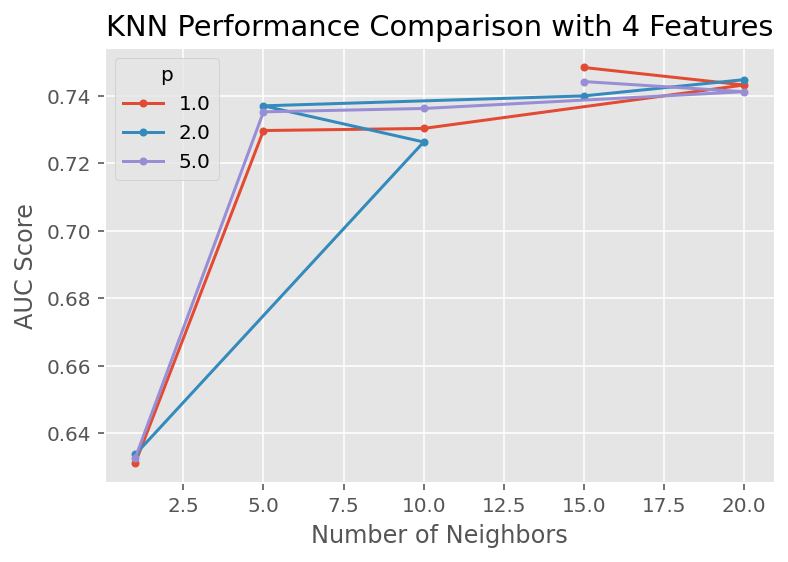

In [42]:
results_KNN_4_features = results_KNN[results_KNN['rfi_fs__n_features_'] == 4]

for i in results_KNN_4_features['knn__p'].unique():
    temp = results_KNN_4_features[results_KNN_4_features['knn__p'] == i]
    plt.plot(temp['knn__n_neighbors'], temp['mean_score'], marker = '.', label = i)
    
plt.legend(title = "p")
plt.xlabel('Number of Neighbors')
plt.ylabel("AUC Score")
plt.title("KNN Performance Comparison with 4 Features")
plt.show()

### (Gaussian) Naive Bayes (NB)

After, Hyperparameter tuning with KNN, we perform Gaussian Naive Bayes model. We optimize the var_smoothing parameter of Gaussian Naive Bayes with the help of grid search. We start with 2,4,6,8,10 and finally we end up adding the whole dataset with 200 values randomly. 

In [43]:
from sklearn.preprocessing import PowerTransformer
D_train_transformed = PowerTransformer().fit_transform(D_train)

In [44]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import RandomizedSearchCV

pipe_NB = Pipeline([('rfi_fs', RFIFeatureSelector()), 
                     ('nb', GaussianNB())])

params_pipe_NB = {'rfi_fs__n_features_': [2,4,6,8,10, Data.shape[1]],
                  'nb__var_smoothing': np.logspace(1,-3, num=200)}

n_iter_search = 200
gs_pipe_NB = RandomizedSearchCV(estimator=pipe_NB, 
                          param_distributions=params_pipe_NB, 
                          cv=cv_method,
                          refit=True,
                          n_jobs=-2,
                          scoring='roc_auc',
                          n_iter=n_iter_search,
                          verbose=1) 

gs_pipe_NB.fit(D_train_transformed, t_train);

Fitting 5 folds for each of 200 candidates, totalling 1000 fits


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=-2)]: Done  44 tasks      | elapsed:    8.0s
[Parallel(n_jobs=-2)]: Done 194 tasks      | elapsed:   26.6s
[Parallel(n_jobs=-2)]: Done 444 tasks      | elapsed:   55.6s
[Parallel(n_jobs=-2)]: Done 794 tasks      | elapsed:  1.6min
[Parallel(n_jobs=-2)]: Done 1000 out of 1000 | elapsed:  2.0min finished


In [45]:
gs_pipe_NB.best_params_

{'rfi_fs__n_features_': 8, 'nb__var_smoothing': 7.934096665797492}

In [46]:
gs_pipe_NB.best_score_

0.7578024547048511

- The mean AUC score of NB is 0.7578024547048511 i.e. slightly higher than KNN model.
- This model outperforms NB.

In [49]:
results_NB = get_search_results(gs_pipe_NB)
results_NB.head()

,mean_score,std_score,max_score,min_score,rfi_fs__n_features_,nb__var_smoothing
157,0.757802,0.026378,0.784108,0.707443,8.0,7.934097
136,0.757365,0.027396,0.785607,0.705232,8.0,6.905514
94,0.757236,0.029688,0.791604,0.702284,8.0,2.494508
26,0.756979,0.031637,0.802099,0.705232,8.0,6.593188
96,0.755737,0.032767,0.803598,0.702284,8.0,2.381686


Let's visualize the search results.

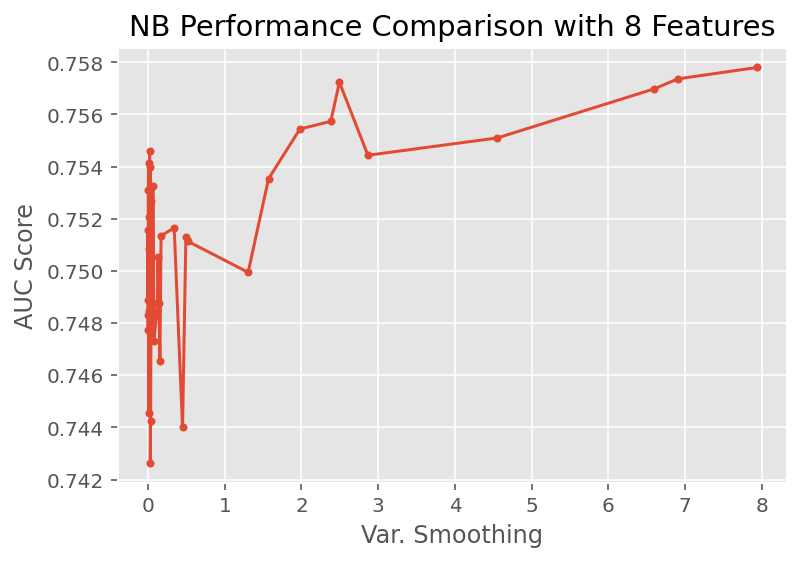

In [50]:
results_NB_8_features = results_NB[results_NB['rfi_fs__n_features_'] == 8].sort_values('nb__var_smoothing')

plt.plot(results_NB_8_features['nb__var_smoothing'], results_NB_8_features['mean_score'], marker = '.', label = i)    
plt.xlabel('Var. Smoothing')
plt.ylabel("AUC Score")
plt.title("NB Performance Comparison with 8 Features")
plt.show()

### Decision Trees (DT)

The third classifier used is the Decision Tree classifier with criterion 'entropy' to maximize information gain. Similar to KNN and NB, features we use are 2,4,6,8,10 and whole data set. We use a combination of maximum depth (3,4,5) and minimum split (2,5) 

In [51]:
from sklearn.tree import DecisionTreeClassifier

pipe_DT = Pipeline([('rfi_fs', RFIFeatureSelector()),
                    ('dt', DecisionTreeClassifier(criterion='entropy', random_state=111))])

params_pipe_DT = {'rfi_fs__n_features_': [2,4,6,8,10, Data.shape[1]],
                  'dt__max_depth': [3, 4, 5],
                  'dt__min_samples_split': [2, 5]}

gs_pipe_DT = GridSearchCV(estimator=pipe_DT, 
                          param_grid=params_pipe_DT, 
                          cv=cv_method,
                          refit=True,
                          n_jobs=-2,
                          scoring='roc_auc',
                          verbose=1) 

gs_pipe_DT.fit(D_train, t_train);

Fitting 5 folds for each of 36 candidates, totalling 180 fits


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=-2)]: Done  44 tasks      | elapsed:    7.7s
[Parallel(n_jobs=-2)]: Done 180 out of 180 | elapsed:   22.4s finished


In [52]:
gs_pipe_DT.best_params_

{'dt__max_depth': 5, 'dt__min_samples_split': 2, 'rfi_fs__n_features_': 8}

In [53]:
gs_pipe_DT.best_score_

0.7147714278453994

- The model has mean AUC score of 0.7147714278453994 with 8 features, maximum depth of 5 and minimum split of 2
- This model has a comparitively low score than KNN and NB models.

In [56]:
results_DT = get_search_results(gs_pipe_DT)
results_DT.head()

,mean_score,std_score,max_score,min_score,dt__max_depth,dt__min_samples_split,rfi_fs__n_features_
27,0.714771,0.048020,0.794228,0.658438,5.0,2.0,8.0
33,0.714106,0.048763,0.794228,0.655859,5.0,5.0,8.0
29,0.711178,0.050653,0.799475,0.652542,5.0,2.0,14.0
21,0.710889,0.045431,0.775487,0.654048,4.0,5.0,8.0
28,0.708378,0.054088,0.799475,0.638541,5.0,2.0,10.0


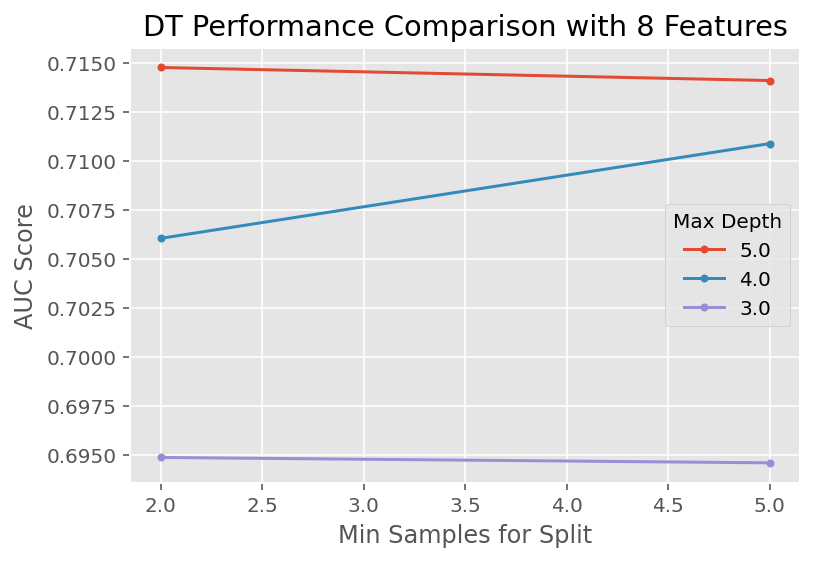

In [55]:
results_DT = get_search_results(gs_pipe_DT)
results_DT_8_features = results_DT[results_DT['rfi_fs__n_features_'] == 8]


for i in results_DT_8_features['dt__max_depth'].unique():
    temp = results_DT_8_features[results_DT_8_features['dt__max_depth'] == i]
    plt.plot(temp['dt__min_samples_split'], temp['mean_score'], marker = '.', label = i)
    
plt.legend(title = "Max Depth")
plt.xlabel('Min Samples for Split')
plt.ylabel("AUC Score")
plt.title("DT Performance Comparison with 8 Features")
plt.show()

### Further Fine Tuning    not good

In the DT model, when we visualize the plot, we see maximum and minimum hyperparameter are at two extreme ends. Hence, it is needed to fine tune the DT model by increasing the maximum depth and minimum splits respectively. 

In [57]:
params_pipe_DT2 = {'rfi_fs__n_features_': [2],
                  'dt__max_depth': [5, 10, 15],
                  'dt__min_samples_split': [5, 50, 100, 150]}

gs_pipe_DT2 = GridSearchCV(estimator=pipe_DT, 
                          param_grid=params_pipe_DT2, 
                          cv=cv_method,
                          refit=True,
                          n_jobs=-2,
                          scoring='roc_auc',
                          verbose=1) 

gs_pipe_DT2.fit(D_train, t_train);

Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=-2)]: Done  44 tasks      | elapsed:    7.3s
[Parallel(n_jobs=-2)]: Done  60 out of  60 | elapsed:    9.1s finished


In [58]:
gs_pipe_DT2.best_params_

{'dt__max_depth': 5, 'dt__min_samples_split': 100, 'rfi_fs__n_features_': 2}

In [59]:
gs_pipe_DT2.best_score_

0.7266167763575839

In [60]:
results_DT = get_search_results(gs_pipe_DT2)
results_DT.head()

,mean_score,std_score,max_score,min_score,dt__max_depth,dt__min_samples_split,rfi_fs__n_features_
2,0.726617,0.063507,0.850075,0.670228,5.0,100.0,2.0
10,0.723768,0.065049,0.850075,0.670228,15.0,100.0,2.0
3,0.722872,0.062664,0.844078,0.677229,5.0,150.0,2.0
7,0.722872,0.062664,0.844078,0.677229,10.0,150.0,2.0
11,0.713727,0.045215,0.798351,0.677229,15.0,150.0,2.0


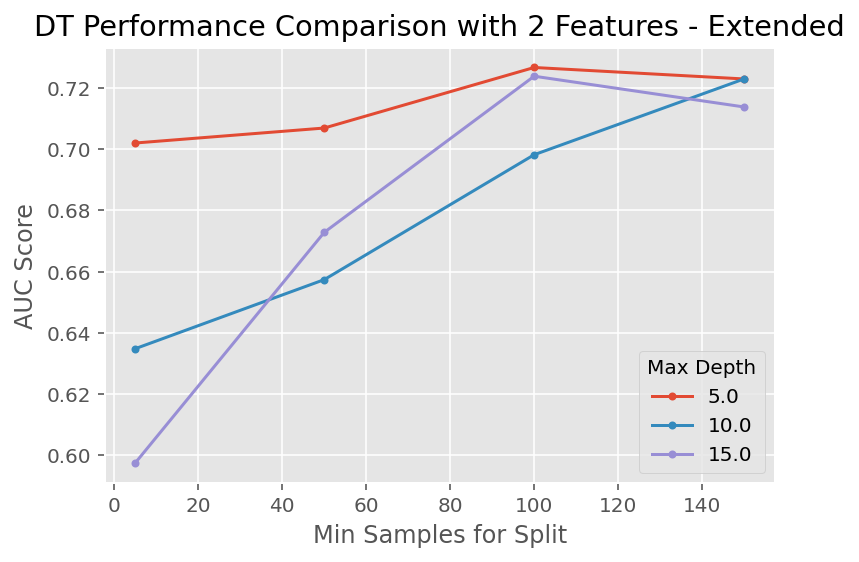

In [61]:
results_DT_2_features = results_DT[results_DT['rfi_fs__n_features_'] == 2].sort_values('dt__min_samples_split')


for i in results_DT_2_features['dt__max_depth'].unique():
    temp = results_DT_2_features[results_DT_2_features['dt__max_depth'] == i]
    plt.plot(temp['dt__min_samples_split'], temp['mean_score'], marker = '.', label = i)
    
plt.legend(title = "Max Depth")
plt.xlabel('Min Samples for Split')
plt.ylabel("AUC Score")
plt.title("DT Performance Comparison with 2 Features - Extended")
plt.show()

- After fine tuning of DT model, we can see mean AUC score of this model has increased from the original DT model.
- Original score of DT model was 0.7147714278453994 and after fine tuning the mean score is 0.7266167763575839
- This model selected 2 features, with maximum depth of 5 and minimum splits of 100

### Random Forest classifier (RF)

After fine tuning of Decision tree model, we implement the Random Forest Classifier using pipeline.
From this model, we would like to find the optimal combinations of maximum depth and Number of Estimators. We start with 2,4,6,8,10 and finally we end up adding the whole dataset.

In [62]:
from sklearn.ensemble import RandomForestClassifier

pipe_RF = Pipeline([('rfi_fs', RFIFeatureSelector()), 
                     ('rf', RandomForestClassifier())])

params_pipe_RF = {'rfi_fs__n_features_': [2,4,6,8,10, Data.shape[1]],
                  'rf__n_estimators': [100,200,300,400],
                  'rf__max_depth': [5,10,15]}

gs_pipe_RF = GridSearchCV(estimator=pipe_RF, 
                          param_grid=params_pipe_RF, 
                          cv=cv_method,
                          refit=True,
                          n_jobs=-2,
                          scoring='roc_auc',
                          verbose=1) 

gs_pipe_RF.fit(D_train, t_train);

Fitting 5 folds for each of 72 candidates, totalling 360 fits


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=-2)]: Done  44 tasks      | elapsed:   14.2s
[Parallel(n_jobs=-2)]: Done 194 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-2)]: Done 360 out of 360 | elapsed:  2.4min finished


In [63]:
gs_pipe_RF.best_params_

{'rf__max_depth': 15, 'rf__n_estimators': 200, 'rfi_fs__n_features_': 14}

In [64]:
gs_pipe_RF.best_score_

0.7661359997967118

- The mean AUC score of RF model is 0.7661359997967118 with 14 features, maximum depth of 15 and 200 n_estimators
- This model outperforms other models

In [65]:
results_RF = get_search_results(gs_pipe_RF)
results_RF.head()

,mean_score,std_score,max_score,min_score,rf__max_depth,rf__n_estimators,rfi_fs__n_features_
59,0.766136,0.030960,0.821214,0.731393,15.0,200.0,14.0
21,0.765464,0.036776,0.829085,0.717760,5.0,400.0,8.0
33,0.764905,0.038794,0.832084,0.712601,10.0,200.0,8.0
23,0.762908,0.030441,0.805097,0.711127,5.0,400.0,14.0
14,0.761825,0.046839,0.845577,0.701548,5.0,300.0,6.0


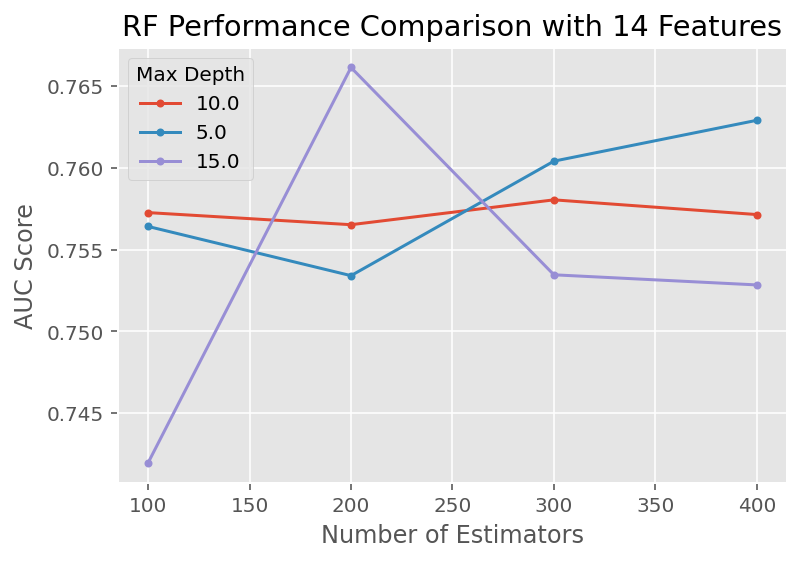

In [66]:
results_RF_14_features = results_RF[results_RF['rfi_fs__n_features_'] == 14].sort_values('rf__n_estimators')


for i in results_RF_14_features['rf__max_depth'].unique():
    temp = results_RF_14_features[results_RF_14_features['rf__max_depth'] == i]
    plt.plot(temp['rf__n_estimators'], temp['mean_score'], marker = '.', label = i)
    
plt.legend(title = "Max Depth")
plt.xlabel('Number of Estimators')
plt.ylabel("AUC Score")
plt.title("RF Performance Comparison with 14 Features")
plt.show()

### Support Vector Machine (SVC)

The last classifier we implement is the Support Vector machine (SVC) with penalty parameters 0.1,1,10,100 and gamma parameters as 1,0.1,0.01,0.001.

In [67]:
from sklearn.svm import SVC

pipe_SV = Pipeline([('rfi_fs', RFIFeatureSelector()), 
                     ('sv', SVC())])

params_pipe_SV = {'rfi_fs__n_features_': [2,4,6,8,10, Data.shape[1]],
                  'sv__C': [0.1,1, 10, 100], 
                  'sv__gamma': [1,0.1,0.01,0.001]}

gs_pipe_SV = GridSearchCV(estimator=pipe_SV, 
                          param_grid=params_pipe_SV, 
                          cv=cv_method,
                          refit=True,
                          n_jobs=-2,
                          scoring='roc_auc',
                          verbose=1) 

gs_pipe_SV.fit(D_train, t_train);

Fitting 5 folds for each of 96 candidates, totalling 480 fits


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=-2)]: Done  44 tasks      | elapsed:    8.0s
[Parallel(n_jobs=-2)]: Done 194 tasks      | elapsed:   26.6s
[Parallel(n_jobs=-2)]: Done 444 tasks      | elapsed:   55.9s
[Parallel(n_jobs=-2)]: Done 480 out of 480 | elapsed:  1.0min finished


In [68]:
gs_pipe_SV.best_params_

{'rfi_fs__n_features_': 14, 'sv__C': 100, 'sv__gamma': 0.01}

In [69]:
gs_pipe_SV.best_score_

0.711811043630727

- The mean score of SVM model is 0.711811043630727 with 14 features and penalty parameter as 100 and gamma parameter as 0.01

In [70]:
results_SV = get_search_results(gs_pipe_SV)
results_SV.head()

,mean_score,std_score,max_score,min_score,rfi_fs__n_features_,sv__C,sv__gamma
94,0.711811,0.033646,0.750184,0.670915,14.0,100.0,0.010
60,0.701720,0.083385,0.782609,0.544584,8.0,100.0,1.000
7,0.700186,0.034157,0.746131,0.654385,2.0,1.0,0.001
44,0.693063,0.085542,0.773029,0.543847,6.0,100.0,1.000
77,0.690379,0.060847,0.796610,0.615328,10.0,100.0,0.100


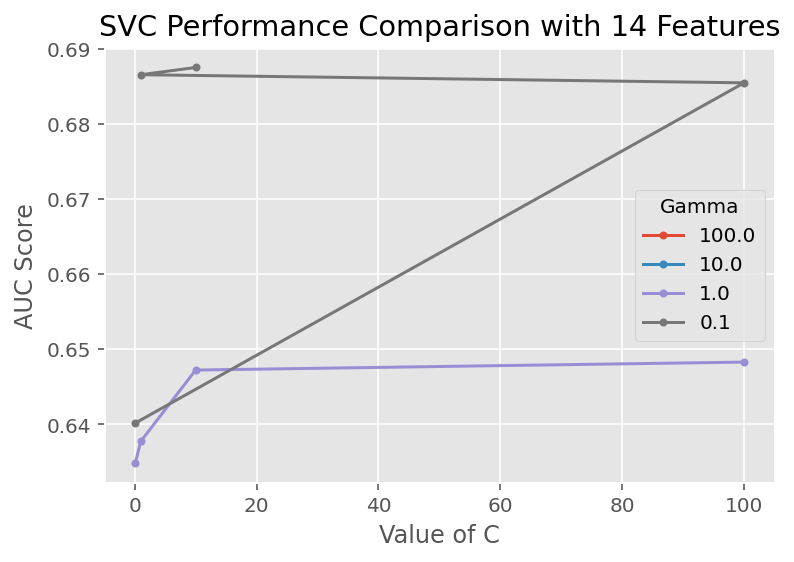

In [73]:
results_SV_14_features = results_SV[results_SV['rfi_fs__n_features_'] == 14].sort_values('sv__gamma')


for i in results_SV_14_features['sv__C'].unique():
    temp = results_SV_14_features[results_SV_14_features['sv__gamma'] == i]
    plt.plot(temp['sv__C'], temp['mean_score'], marker = '.', label = i)
    
plt.legend(title = "Gamma")
plt.xlabel('Value of C')
plt.ylabel("AUC Score")
plt.title("SVC Performance Comparison with 14 Features")
plt.show()

## Model Comparison <a name="MMCC"></a>

- In the above step, we used the training dataset to implement all the classifiers. From the five classifiers we implemented, we found Random Forest Classifier as the best performing classifier. 
- In the model comparison step, we fit all these models on the test dataset to find the best performing model.
- Later we would perform, paired t-tests to check if the models are statistically significant.

In [74]:
from sklearn.model_selection import cross_val_score

cv_method_ttest = StratifiedKFold(n_splits=10, random_state=999)

cv_results_KNN = cross_val_score(estimator=gs_pipe_KNN.best_estimator_,
                                 X=D_test,
                                 y=t_test, 
                                 cv=cv_method_ttest, 
                                 n_jobs=-2,
                                 scoring='roc_auc')
cv_results_KNN.mean()

0.635181623931624

In [75]:
D_test_transformed = PowerTransformer().fit_transform(D_test)

cv_results_NB = cross_val_score(estimator=gs_pipe_NB.best_estimator_,
                                X=D_test_transformed,
                                y=t_test, 
                                cv=cv_method_ttest, 
                                n_jobs=-2,
                                scoring='roc_auc')
cv_results_NB.mean()

0.7411752136752138

In [76]:
cv_results_DT = cross_val_score(estimator=gs_pipe_DT2.best_estimator_,
                                X=D_test,
                                y=t_test, 
                                cv=cv_method_ttest, 
                                n_jobs=-2,
                                scoring='roc_auc')
cv_results_DT.mean()

0.6347435897435898

In [77]:
cv_results_RF = cross_val_score(estimator=gs_pipe_RF.best_estimator_,
                                X=D_test,
                                y=t_test, 
                                cv=cv_method_ttest, 
                                n_jobs=-2,
                                scoring='roc_auc')
cv_results_RF.mean()

0.7460042735042733

In [78]:
cv_results_SV = cross_val_score(estimator=gs_pipe_SV.best_estimator_,
                                X=D_test,
                                y=t_test, 
                                cv=cv_method_ttest, 
                                n_jobs=-2,
                                scoring='roc_auc')
cv_results_SV.mean()

0.7592521367521369

Here, we find the best performing model is Support vector machine with a mean score of 0.759.
The second best performing model is Random Forest followed by Gaussian Naive Bayes, KNN and Decision trees.

In [81]:
from scipy import stats

print(stats.ttest_rel(cv_results_KNN, cv_results_RF))
print(stats.ttest_rel(cv_results_KNN, cv_results_DT))
print(stats.ttest_rel(cv_results_KNN, cv_results_NB))
print(stats.ttest_rel(cv_results_KNN, cv_results_RF))
print(stats.ttest_rel(cv_results_DT, cv_results_RF))
print(stats.ttest_rel(cv_results_DT, cv_results_NB))
print(stats.ttest_rel(cv_results_DT, cv_results_SV))
print(stats.ttest_rel(cv_results_RF, cv_results_NB))
print(stats.ttest_rel(cv_results_RF, cv_results_SV))
print(stats.ttest_rel(cv_results_SV, cv_results_NB))

Ttest_relResult(statistic=-3.2126860524923764, pvalue=0.010613109362806112)
Ttest_relResult(statistic=0.008678370330482086, pvalue=0.9932650726516291)
Ttest_relResult(statistic=-2.2066136498877618, pvalue=0.05474683796112822)
Ttest_relResult(statistic=-3.2126860524923764, pvalue=0.010613109362806112)
Ttest_relResult(statistic=-3.0199021705479976, pvalue=0.014481610209515156)
Ttest_relResult(statistic=-2.368619707302332, pvalue=0.042003868632563966)
Ttest_relResult(statistic=-2.3754717814541646, pvalue=0.04153481724893735)
Ttest_relResult(statistic=0.119630308441458, pvalue=0.907403880070618)
Ttest_relResult(statistic=-0.4993016018636967, pvalue=0.629544004276412)
Ttest_relResult(statistic=0.4094754194918028, pvalue=0.6917647086998512)


A p-value smaller than 0.05 indicates a statistically significant difference. Looking at these results, we conclude that at a 95% significance level, SVM is statistically the best model in this competition (in terms of AUC) when compared on the test data.

We consider the following metrics to evaluate models based on the test set:

- Accuracy
- Precision
- Recall
- F1 Score (the harmonic average of precision and recall)
- Confusion Matrix

These metrics can be computed using classification_report from sklearn.metrics as shown below

In [82]:
pred_KNN = gs_pipe_KNN.predict(D_test)

In [83]:
Data_test_transformed = PowerTransformer().fit_transform(D_test)
pred_NB = gs_pipe_NB.predict(Data_test_transformed)

In [84]:
pred_DT = gs_pipe_DT.predict(D_test)

In [85]:
pred_RF = gs_pipe_RF.predict(D_test)

In [86]:
pred_SV = gs_pipe_SV.predict(D_test)

In [87]:
from sklearn import metrics
print("\nClassification report for K-Nearest Neighbor") 
print(metrics.classification_report(t_test, pred_KNN))
print("\nClassification report for Naive Bayes") 
print(metrics.classification_report(t_test, pred_NB))
print("\nClassification report for Decision Tree") 
print(metrics.classification_report(t_test, pred_DT))
print("\nClassification report for Random Forest Classifier") 
print(metrics.classification_report(t_test, pred_RF))
print("\nClassification report for Support Vector Machine") 
print(metrics.classification_report(t_test, pred_SV))


Classification report for K-Nearest Neighbor
              precision    recall  f1-score   support

           0       0.76      0.74      0.75       123
           1       0.43      0.46      0.44        52

    accuracy                           0.66       175
   macro avg       0.60      0.60      0.60       175
weighted avg       0.66      0.66      0.66       175


Classification report for Naive Bayes
              precision    recall  f1-score   support

           0       0.70      1.00      0.83       123
           1       0.00      0.00      0.00        52

    accuracy                           0.70       175
   macro avg       0.35      0.50      0.41       175
weighted avg       0.49      0.70      0.58       175


Classification report for Decision Tree
              precision    recall  f1-score   support

           0       0.79      0.66      0.72       123
           1       0.42      0.58      0.48        52

    accuracy                           0.63       175
  

The confusion matrices are given below.

In [88]:
from sklearn import metrics
print("\nConfusion matrix for K-Nearest Neighbor") 
print(metrics.confusion_matrix(t_test, pred_KNN))
print("\nConfusion matrix for Naive Bayes") 
print(metrics.confusion_matrix(t_test, pred_NB))
print("\nConfusion matrix for Decision Tree") 
print(metrics.confusion_matrix(t_test, pred_DT))
print("\nConfusion matrix for Random Forest Classifier") 
print(metrics.confusion_matrix(t_test, pred_RF))
print("\nConfusion matrix for Support Vector Machine") 
print(metrics.confusion_matrix(t_test, pred_SV))


Confusion matrix for K-Nearest Neighbor
[[91 32]
 [28 24]]

Confusion matrix for Naive Bayes
[[123   0]
 [ 52   0]]

Confusion matrix for Decision Tree
[[81 42]
 [22 30]]

Confusion matrix for Random Forest Classifier
[[100  23]
 [ 41  11]]

Confusion matrix for Support Vector Machine
[[123   0]
 [ 52   0]]


From the hyperparameter tuning, we find Support vector machine is statistically significant from the AUC score, however, from the Classification report and confusion matrices, Decision Tree is statistically the performer.

# Critique & Limitations <a name="CCL"></a>

The goal of this experiment was to see whether we could develop a model that could classify if a person has or does not have liver disease. The following models were investigated: K-Nearest Neighbor Model, Gaussian Naive Bayes, A Decision Tree, Random Forest Classifier, Support Vector Machine. These five classifiers have good classification rates, precisions, and recall metrics. As a result, all five classifiers are possible candidates for predicting if patients suffer from a liver disease. The precision score of the KNN model is the highest, however, the recall of Decision tree is the highest. For further study, we may think about doing a more in-depth analysis of the feature selection and ranking process, as well as our hyperparameter space selections. Also, the sample size is small hence, results may not be one hundred percent correct. In future, we would like to work on comparitively larger dataset. In terms of precision metric, the Decision tree classifier is the best performing model and in terms of mean AUC score the SVM is the best performing model. Hence, this would give a biased result.


# Summary & Conclusions <a name="CC"></a>

## Project Summary <a name="PPS"></a>

- The main objective of the Indian Liver patient’s data is to analyse the patient’s records, develop a statistical algorithm to reduce the patient’s risk of contracting a liver disease.

- In the `project phase 1`, we performed data preprocessing and data exploration. 

- The data pre-processing included checking of missing values, removing of outliers, checking the datatypes etc. In the data exploration section, we visualized each attribute in the liver disease dataset.

- A summary and meaning of the important variables in the dataset is as follows:

- TB - Normal range of TB is 1.2 mg/dL. From the data exploration it shows that, Total Bilirubin in the blood in maximum of the patients is above 1.1 however some of the patients have more than 1.4 mg/dL Amount of bilirubin present in blood can be found using a bilirubin test. If the bilirubin levels are higher, it suggests that you might have liver disease namely cirrhosis or cancer.

- DB - Normal range of DB is 0.3 mg/dL. Maximum of the patients have Direct bilirubin levels greater than a normal range i.e., between 0.4 to 0.6. Bilirubin is attached to albumin in blood. This type of bilirubin is called indirect or unconjugated bilirubin. If the levels are higher than normal, then it indicates that liver is not functioning properly and might be suffering from a disease.

- Alkphos Alkaline Phosphotase - Normal range of Alkphos Alkaline Phosphotase is 44 to 147 international units per liter (IU/L). The results show that, maximum patients have ALP levels more than 150 IU/L. It is an enzyme found in the body. If the Alkphos Alkaline Phosphotase levels are higher than a nominal level, then it would suggest that, liver is not working properly. The conditions would be liver cancer, cirrhosis, hepatitis.

- Sgpt Alamine Aminotransferase - Normal range of Sgpt Alamine Aminotransferase is 7 to 56 units per serum. The exploration tells us that, SGPT levels in patients are in the given normal range however some of the patients have the levels slightly more than 56. Normally, the levels of Sgpt Alamine Aminotransferase enzyme are low and if the levels start increasing then it might suggest the person is suffering from liver disease.

- Sgot Aspartate aminotransferase - Normal range of Sgot Aspartate aminotransferase is between 5 to 40 units per litre of serum. The SGOT levels of maximum of the patients are more than the normal range of 40. These levels are seen to be around 50 which are considered considerably high. The sgot levels in blood are low but if these levels are high then it would suggest that person suffers from liver disease.

- TP - Normal range of TP is 6 to 8 g/dL. The total proteins levels are in the normal range for maximum number of the patients. Proteins in the blood are mostly made by a person liver. Lower levels of TP than a nominal count suggest that the person has liver or kidney disorder. Higher levels than a nominal count suggest that person is suffering from chronic infection like HIV or Hepatitis.

- ALB - Nominal range of Albumin is 3.4 to 5.4 g/dl. The albumin levels for most of the patients are in the normal range. These levels lie between 3 to 5 g/dL. If the albumin levels are lower than this, then the person would suffer from malnutrition. If the albumin levels are higher than this, then the person is suffering from a liver disease.

- A/G Ratio - A normal A/G Ratio is over one. In the results it can be seen maximum number of the patients have an AG Ratio of over one. If the A/G ratio is higher than this, then it suggests that person a suffering from a liver disease or leukemia. A low level of A/G Ratio is caused due to over production of globulins.

- In `project phase 2`, we use preprocessed dataset from phase 1 and transform the dataset. Data transformation includes, encoding the descriptive features into numeric (categorical features) and scaling the other descriptive features. We split the dataset into into train and test dataset with a 70:30 ratio. Hence, the training dataset contains 408 instances and test dataset contains 175 instances.

- We performed feature ranking and selected the best features. We performed feature selection using F-score, Mutual information, Random Forest Importance and SpFSR. From all these methods, we selected the best features using Random Forest Importance with 100 estimators inside a pipeline. The best features were categorized by selecting 2,4,6,8,10 and all the features after encoding and scaling the descriptive features.

- We implement a 5-fold stratified cross validation to fine tune hyper-parameters of each classifier using AUC (Area Under Curve) as performance metric. This is done by using feature selection and hyperparameter search within a single pipeline. The selector field i.e. the target feature has more values of patients with a liver disease, it is important to stratify the dataset so that this dataset and the original dataset has same proportion of classes. Once, the classification is performed, they are fitted on the test data using a 10-fold cross-validation. The next step performed is the paired t-tests to check their performance and check if they are statistically significant.

- Finally, these classifiers are compared on the test data using their recall scores and confusion matrices.


## Summary of Findings <a name="SSOF"></a>

- In phase 2 of the project, we used Random Forest Importance for feature selection and ranking. After feature selection and ranking, we used five binary classifiers namely, K-Nearest Neighbors, Gaussian Naive Bayes, Decision Tree, Random Forest Classifier and Support Vector machine.
- We implemented hyperparameter tuning with 5-fold cross validation and we optimised each of these models.
- From all the binary classifiers, we found the mean score of SVM the highest in other words SVM outperforms all the other classifiers.
- After, hyperparameter tuning, we fitted these models on the test dataset. In that step, we found a similar result that showed SVM outperforming other models.
- To check if the model is statistically significant, we performed paired t-tests.
- In the paired t-tests, we find the SVM model is statistically significant as the p_value is less than 0.05.
- Further, we found confusion matrices. In the confusion matrices, we found the precision score of Decision tree the highest and recall of KNN the highest.
- As recall is equal to the true positive rate, we can say that, KNN would be a best performer.

## Conclusions <a name="CCC"></a>

After analysing the dataset performing data pre-processing and exploration in phase 1 and predictive modelling phase 2, it can be concluded that there are various important factors that would lead to predict whether or not the person is suffering from liver disease. From phase 1, we find that Total and Direct Bilirubin levels, SGPT and SGOT levels, ALP level, total proteins level in the blood, Albumin and Albumin to Globulin ratio have a key relationship with one another. In the phase 2, we find the metric of recall is the most appropriate to compare the best performing models. Therefore, we can conclude that, Decision tree is one of the best performing in terms on precision score, Support Vector machine best performing in terms of mean AUC score and K-Nearest neighbor in terms of recall or true positive rate.

### References

From module notes (week 1 to week 12) of course Math2319 Machine Learning and Case study, Professor Aksakalli Vural, RMIT University, https://www.featureranking.com/tutorials/machine-learning-tutorials/case-study-predicting-income-status/#Summary-Statistics